In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
#reading csv file
df=pd.read_csv(r'C:\Users\dell\Documents\final_dataset.csv')
df

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149
...,...,...,...,...,...,...,...,...,...,...,...,...
1456,27,12,2024,0,5,58.43,249.17,41.69,65.89,0.99,36.25,263
1457,28,12,2024,0,6,33.83,150.77,33.31,66.14,0.79,35.19,113
1458,29,12,2024,1,7,31.21,139.75,27.01,65.94,0.57,35.88,142
1459,30,12,2024,0,1,38.01,152.83,29.12,65.16,0.55,38.38,116


In [3]:
#displaying first 20 columns
df.head(20)

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149
5,6,1,2021,0,3,155.59,180.14,142.71,10.29,1.18,44.47,252
6,7,1,2021,0,4,118.39,131.18,98.87,9.81,0.73,48.60,288
7,8,1,2021,0,5,140.05,184.29,102.61,10.34,0.79,43.06,248
8,9,1,2021,0,6,144.01,192.43,108.43,10.41,0.85,42.23,326
9,10,1,2021,1,7,131.57,180.38,93.31,9.92,0.69,51.96,284


In [4]:
#summary of data frame
df.info()
#check for null values(none in my case)
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1461 non-null   int64  
 1   Month           1461 non-null   int64  
 2   Year            1461 non-null   int64  
 3   Holidays_Count  1461 non-null   int64  
 4   Days            1461 non-null   int64  
 5   PM2.5           1461 non-null   float64
 6   PM10            1461 non-null   float64
 7   NO2             1461 non-null   float64
 8   SO2             1461 non-null   float64
 9   CO              1461 non-null   float64
 10  Ozone           1461 non-null   float64
 11  AQI             1461 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 137.1 KB


Date              0
Month             0
Year              0
Holidays_Count    0
Days              0
PM2.5             0
PM10              0
NO2               0
SO2               0
CO                0
Ozone             0
AQI               0
dtype: int64

In [5]:
#statistical summary of numeric columns
df.describe()

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,15.729637,6.522930,2022.501027,0.189596,4.000684,90.774538,218.219261,37.184921,20.104921,1.025832,36.338871,202.210815
std,8.803105,3.449884,1.118723,0.392116,2.001883,71.650579,129.297734,35.225327,16.543659,0.608305,18.951204,107.801076
min,1.000000,1.000000,2021.000000,0.000000,1.000000,0.050000,9.690000,2.160000,1.210000,0.270000,2.700000,19.000000
25%,8.000000,4.000000,2022.000000,0.000000,2.000000,41.280000,115.110000,17.280000,7.710000,0.610000,24.100000,108.000000
50%,16.000000,7.000000,2023.000000,0.000000,4.000000,72.060000,199.800000,30.490000,15.430000,0.850000,32.470000,189.000000
75%,23.000000,10.000000,2024.000000,0.000000,6.000000,118.500000,297.750000,45.010000,26.620000,1.240000,45.730000,284.000000
max,31.000000,12.000000,2024.000000,1.000000,7.000000,1000.000000,1000.000000,433.980000,113.400000,4.700000,115.870000,500.000000


In [6]:
df.corr(numeric_only=True) ##PM10 and PM2.5 shows the strongest correlation with AQI, with coefficients of 0.89 and 0.80 respectively. This suggests that particulate matter is the main contributor to poor air quality in Delhi.CO(0.696809) moderately contributes to AQI,less than PM2.5 and PM10 and gases like SO2 and NO2 contribute  very less to AQI(0.319261) while the remaining gases show almost no relationship with AQI 

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
Date,1.000000,0.010522,0.001384,0.019424,0.001487,0.020023,0.011082,0.008788,0.044515,0.033665,-0.010748,-0.001057
Month,0.010522,1.000000,-0.001204,0.002100,0.002824,-0.074140,0.046479,0.082342,0.142763,0.081195,-0.102716,-0.034169
Year,0.001384,-0.001204,1.000000,0.008144,-0.002600,-0.254641,0.034936,-0.078301,0.612480,-0.202139,0.092638,-0.083563
Holidays_Count,0.019424,0.002100,0.008144,1.000000,0.514644,-0.008869,-0.016789,-0.005577,0.008760,-0.003863,0.007388,0.000447
Days,0.001487,0.002824,-0.002600,0.514644,1.000000,0.006395,-0.024105,0.018301,-0.009367,0.000779,0.022247,0.002113
PM2.5,0.020023,-0.074140,-0.254641,-0.008869,0.006395,1.000000,0.721745,0.245283,-0.082946,0.690090,-0.159882,0.801960
PM10,0.011082,0.046479,0.034936,-0.016789,-0.024105,0.721745,1.000000,0.270478,0.131045,0.647241,-0.152054,0.899421
NO2,0.008788,0.082342,-0.078301,-0.005577,0.018301,0.245283,0.270478,1.000000,0.057626,0.329214,-0.155068,0.319261
SO2,0.044515,0.142763,0.612480,0.008760,-0.009367,-0.082946,0.131045,0.057626,1.000000,-0.068631,0.188534,0.036288
CO,0.033665,0.081195,-0.202139,-0.003863,0.000779,0.690090,0.647241,0.329214,-0.068631,1.000000,-0.199935,0.696809


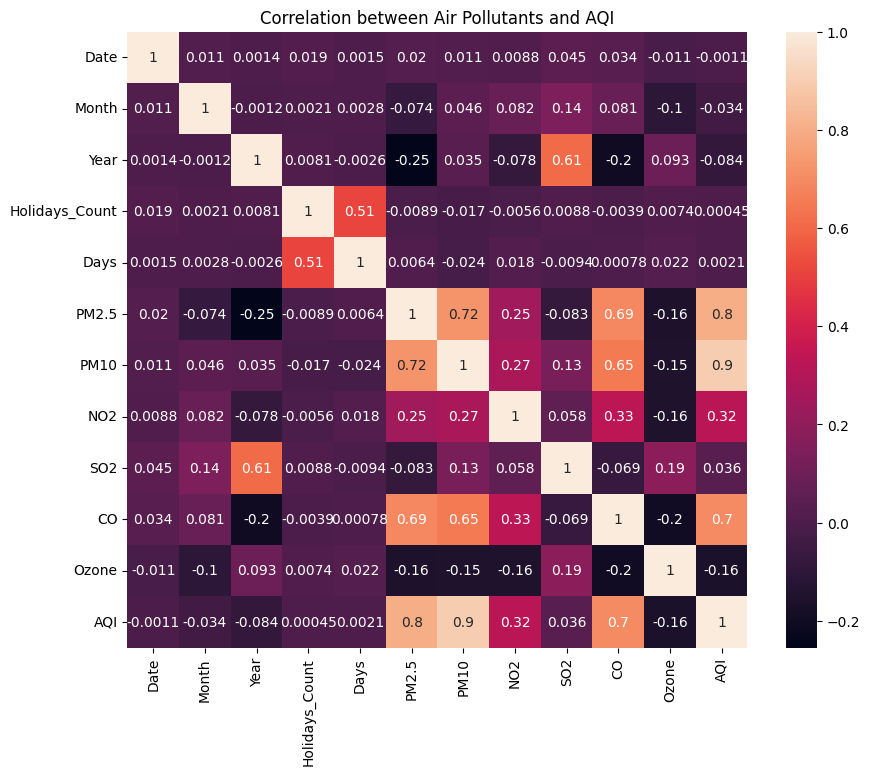

In [7]:
#heatmap to show correlation between air pollutants and AQI
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title('Correlation between Air Pollutants and AQI')
plt.show()

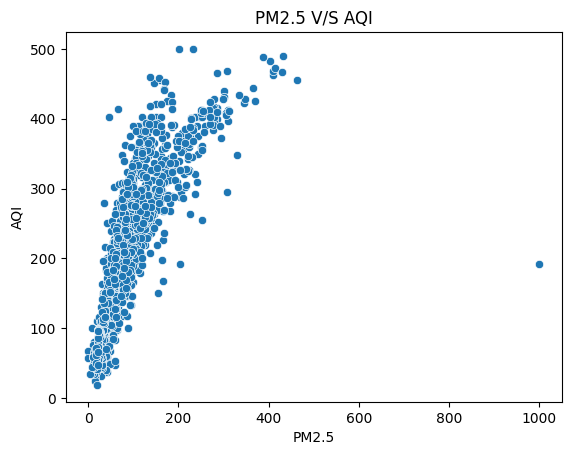

In [8]:
#the scatter plot clearly shows that relationship between AQI AND PM2.5 is strongly linear(0.8,though there are few outliers)
sns.scatterplot(data=df,x='PM2.5',y='AQI')
plt.title('PM2.5 V/S AQI')
plt.show()

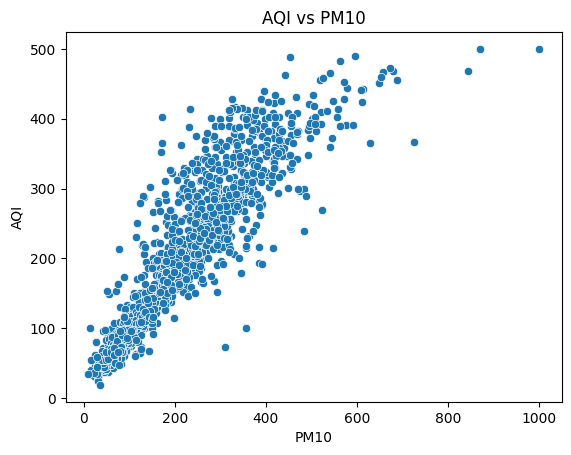

In [9]:
sns.scatterplot(data=df, x='PM10', y='AQI')
plt.title('AQI vs PM10')
plt.show()

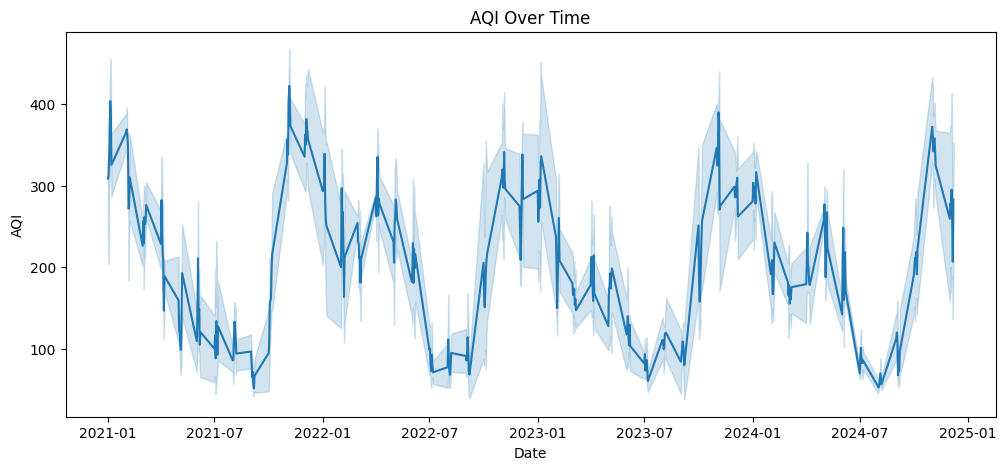

In [10]:
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Days']])
df = df.sort_values('Date')
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x='Date', y='AQI')
plt.title('AQI Over Time')
plt.show()
#AQI tends to spike up at the end of year in Delhi(possibly due to celebration of diwali festival which is celebrated in october or november)
#AQI drops during mid year
#It repeats every year

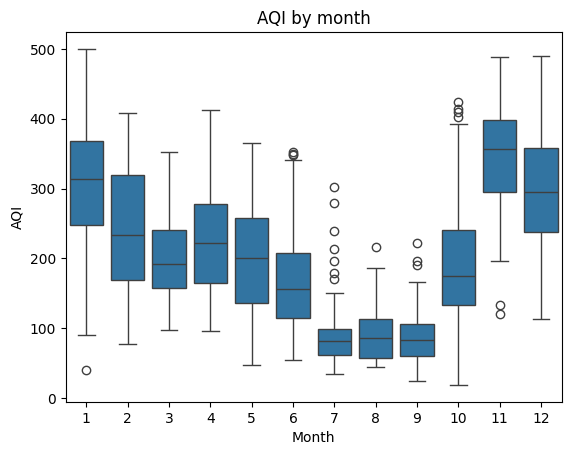

In [11]:
# Create a box plot to visualize AQI distribution across different months
sns.boxplot(data=df,x='Month',y='AQI')
plt.title('AQI by month')
plt.show()
#Again it proves that AQI spikes during end of the year and is best during monsoon(month 7,8 and9)

# -----ML for predicting AQI------

In [12]:
#selecting features
X = df[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone']]

#selecting target variable
y=df['AQI']

In [13]:
#splitting the dataset into training and testing(80% for training and 20% for testing)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
#import library to calculate mean squared error
from sklearn.metrics import mean_squared_error
#creating a linear regrerssion model object
reg=LinearRegression()

#fitting the linear regression model using training data
reg.fit(X_train,y_train)

#making predictions on test data
lr_pred=reg.predict(X_test)

import numpy as np

#calculating root mean squared error 
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
print(lr_rmse)


44.51401521921917


In [15]:
from sklearn.ensemble import RandomForestRegressor 
#Random Forest Regressor model object
rf_model = RandomForestRegressor()

#fitting the random forest model using training data
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [16]:
#making predictions on test data
rf_pred = rf_model.predict(X_test)    

In [17]:
#calculating root mean squared error for Random Forest
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
print("Random Forest RMSE:", rf_rmse)  

Random Forest RMSE: 37.31404192679581


In [18]:
#comparing which model performs better based on RMSE value
if(rf_rmse > lr_rmse):
    print("Linear Regression works better")
else:
    print("Random Forest works better")

Random Forest works better


## ------DATA VISUALIZATION------

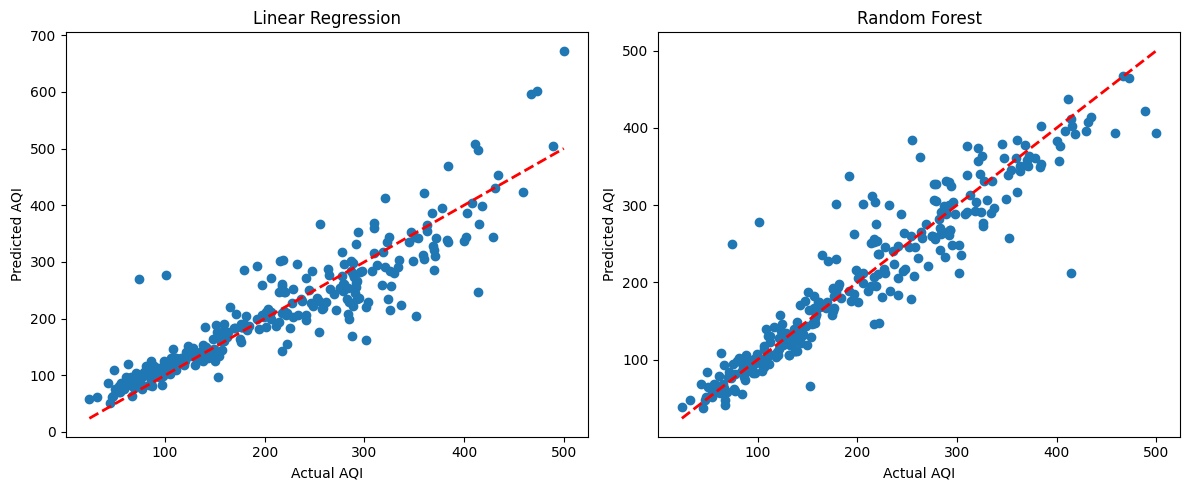

In [19]:


import matplotlib.pyplot as plt

#to create both plots together side by side for comparison
plt.figure(figsize=(12, 5))

# Left subplot
plt.subplot(1,2,1)
#Create a scatter plot: actual AQI V/S predicted AQI for linear regression
plt.scatter(y_test, lr_pred)
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
#drawing perfect prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Linear Regression')

# Right subplot  
plt.subplot(1,2,2)
#Create a scatter plot: actual AQI V/S predicted AQI for Random Forest
plt.scatter(y_test, rf_pred)  
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
#drawing perfect prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Random Forest')

plt.tight_layout()
plt.show()  